In [1]:
#dataset sourced by an individual csgo player from https://www.kaggle.com/thesiff/counterstrike

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import train_test_split function
from sklearn.model_selection import train_test_split 

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

 #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 



from sklearn import tree
from sklearn.tree import export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CSGOComplete.csv')
df.head(10)

,Map,Day,Month,Year,Date,Wait Time(s),Match Time(s),Team A Rounds,Team B Rounds,Ping,Kills,Assists,Deaths,Mvp's,HS%,Points,Result
0,Mirage,3,8,2018,3/8/2018,327,2906,16,13,215,17,2,21,2,5,45,Win
1,Mirage,2,8,2018,2/8/2018,336,2592,16,11,199,13,4,24,2,0,40,Lost
2,Mirage,31,7,2018,31/7/2018,414,2731,16,14,85,15,3,18,3,26,37,Win
3,Mirage,31,7,2018,31/7/2018,317,2379,11,16,93,12,2,15,2,16,30,Lost
4,Mirage,30,7,2018,30/7/2018,340,3467,15,15,94,33,5,20,5,30,83,Tie
5,Mirage,29,7,2018,29/7/2018,391,1881,16,4,88,13,2,17,1,38,34,Lost
6,Dust II,28,7,2018,28/7/2018,274,3194,16,14,89,19,5,24,2,15,52,Lost
7,Mirage,27,7,2018,27/7/2018,291,2859,16,14,82,17,1,25,0,35,37,Lost
8,Mirage,27,7,2018,27/7/2018,184,2300,16,8,112,25,10,12,4,16,70,Win
9,Mirage,27,7,2018,27/7/2018,375,2184,6,16,89,13,1,17,0,61,31,Lost


In [3]:
#simple analysis of win/loss data

newdf = df.drop(columns = ['Map','Day','Month','Year','Date','Wait Time(s)'])
newdf = newdf.drop(columns = ['Team A Rounds','Team B Rounds','Kills','Assists','Deaths','Mvp\'s','HS%','Points'])
newdf = newdf.sort_values(['Ping'])
newdf.head(10)

,Match Time(s),Ping,Result
671,1899,0,Win
89,2752,0,Tie
746,1529,0,Lost
341,2291,0,Win
1057,2280,0,Lost
351,1798,0,Lost
291,2973,0,Tie
290,2922,0,Tie
206,2214,0,Lost
285,1619,0,Lost


In [4]:
winner = newdf.loc[(newdf['Ping'] >= 150) & (newdf['Result'] == 'Win')]
loser = newdf.loc[(newdf['Ping'] >= 150) & (newdf['Result'] == 'Lost')]
print('+ Average match time = {} minutes'.format(int(newdf[' Match Time(s)'].mean()/60)))
a = newdf.loc[(newdf[' Match Time(s)'] >= 2280) & (newdf['Result'] == 'Win')].shape[0]
b = newdf.loc[(newdf[' Match Time(s)'] <= 2280) & (newdf['Result'] == 'Win')].shape[0]
print('+ Wins if time greater than 38 minutes = {}'.format(a))
print('+ Wins if time less than 38 minutes = {}'.format(b))
print('+ The ratio {0:.4f} concludes that length of match does not have a big impact on win/loss'.format(a/b))

+ Average match time = 38 minutes
+ Wins if time greater than 38 minutes = 232
+ Wins if time less than 38 minutes = 256
+ The ratio 0.9062 concludes that length of match does not have a big impact on win/loss


In [5]:
total = loser.shape[0] + winner.shape[0]
winratio = winner.shape[0]/total
print('+ Chances of winning with ping greater than 150ms = {0:.4f}%'.format(winratio*100))

+ Chances of winning with ping greater than 150ms = 39.0625%


In [6]:
win150 = newdf.loc[(newdf['Ping'] <= 150) & (newdf['Result'] == 'Win')]
loss150 = newdf.loc[(newdf['Ping'] <= 150) & (newdf['Result'] == 'Lost')]
total150 = loss150.shape[0] + win150.shape[0]
winratio150 = win150.shape[0]/total150
print('+ Chances of winning with ping less than 150ms = {0:.4f}%'.format(winratio150*100))

+ Chances of winning with ping less than 150ms = 47.0051%


In [7]:
mvpg2 = df.loc[(df['Mvp\'s']>2) & (df['Result'] == 'Win')].shape[0]
mvpl2 = df.loc[(df['Mvp\'s']<2) & (df['Result'] == 'Win')].shape[0]
ratio = mvpg2 / mvpl2
print('+ Winning ratio if you mvp\'s were greater than 2 = {0:.2f}'.format(ratio))

+ Winning ratio if you mvp's were greater than 2 = 1.22


In [8]:
print('+ Conclusion:\n** There\'s a good chance that you will lose 5 matches out of 10 regularly if you got a fair competition.\n** Ping does matter but would make you win just 1 more match if you\'ve the upper side with ping and similar competition.')

+ Conclusion:
** There's a good chance that you will lose 5 matches out of 10 regularly if you got a fair competition.
** Ping does matter but would make you win just 1 more match if you've the upper side with ping and similar competition.


In [9]:
ntie = newdf.loc[(newdf['Result'] == 'Tie')].shape[0]
ratiotie = ntie / newdf.shape[0]
print('+ Also tie percentage: {0:.4f}%'.format(ratiotie*100))

+ Also tie percentage: 7.5022%


In [10]:
#Decision Tree algorithm implementation

col_names = ['Map', ' Match Time(s)', 'Ping', 'Kills', 'Assists', 'Deaths', 'HS%', 'Mvp\'s', 'Points', 'Result']
model_df = df[col_names]

print ("Dataset Length: ", len(model_df)) 
print ("Dataset Shape: ", model_df.shape)     
model_df.head(10)

Dataset Length:  1133
Dataset Shape:  (1133, 10)


,Map,Match Time(s),Ping,Kills,Assists,Deaths,HS%,Mvp's,Points,Result
0,Mirage,2906,215,17,2,21,5,2,45,Win
1,Mirage,2592,199,13,4,24,0,2,40,Lost
2,Mirage,2731,85,15,3,18,26,3,37,Win
3,Mirage,2379,93,12,2,15,16,2,30,Lost
4,Mirage,3467,94,33,5,20,30,5,83,Tie
5,Mirage,1881,88,13,2,17,38,1,34,Lost
6,Dust II,3194,89,19,5,24,15,2,52,Lost
7,Mirage,2859,82,17,1,25,35,0,37,Lost
8,Mirage,2300,112,25,10,12,16,4,70,Win
9,Mirage,2184,89,13,1,17,61,0,31,Lost


In [11]:
# split dataset in features and target variable

feature_cols = [' Match Time(s)', 'Ping', 'Kills', 'Assists', 'Deaths', 'Mvp\'s', 'HS%', 'Points']
X = model_df[feature_cols] # Features
y = model_df['Result'] # Target variable

In [12]:
 # 80% training and 20% test
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
# Create Decision Tree classifer object

clf_gini = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=4,
                                  min_samples_split=20,
                                  min_samples_leaf=10)

# Train Decision Tree Classifer
clf_gini = clf_gini.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_gini.predict(X_test)
# print("Predicted values:") 
# print(y_pred) 

In [14]:
# Model Accuracy, how often is the classifier correct?

%precision %.2f
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)
print("Precision Score : ", precision_score(y_test, y_pred, average=None, zero_division=0)*100)
print("Report : \n", classification_report(y_test, y_pred)) 

Confusion Matrix : 
 [[99  0 16]
 [13  0  2]
 [27  0 70]]
Accuracy :  74.44933920704845
Precision Score :  [71.22302158  0.         79.54545455]
Report : 
               precision    recall  f1-score   support

        Lost       0.71      0.86      0.78       115
         Tie       0.00      0.00      0.00        15
         Win       0.80      0.72      0.76        97

    accuracy                           0.74       227
   macro avg       0.50      0.53      0.51       227
weighted avg       0.70      0.74      0.72       227



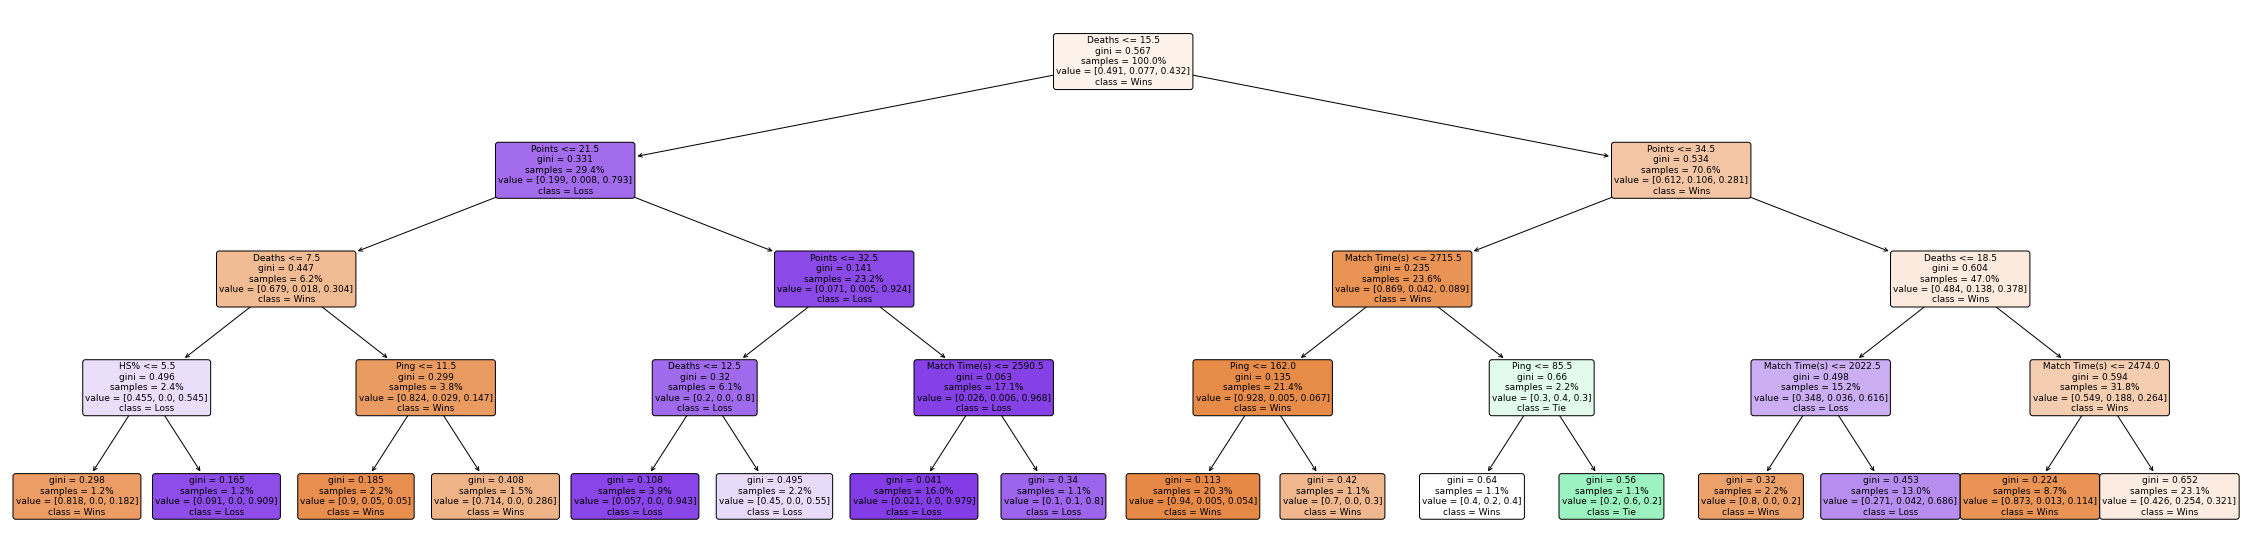

In [16]:
# visualizing the decio tree graph

fig = plt.figure(figsize=(40,10))
_ = tree.plot_tree(clf_gini,
              feature_names=feature_cols,
              class_names=list(['Wins','Tie','Loss']),
              filled=True,
              proportion=True,
              rounded =True)

In [17]:
print(clf_gini.predict([[2906,215,17,2,21,5,2,45]]))
print(clf_gini.predict([[3000,45,19,4,20,50,24,67]]))
print(clf_gini.predict([[2400,45,45,4,5,50,24,67]]))

['Lost']
['Lost']
['Win']
